In [23]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [20]:
stats = "/Users/toddhendricks/Downloads/leaguedashplayerstats_LeagueDashPlayerStats__PerMode-PerGame_LeagueID-00_Season-2019-20_SeasonType-Regular Season.csv"

In [21]:
nba_df = pd.read_csv(stats)

In [22]:
nba_df.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

Text(0.5, 1.0, 'NBA Player Age: 2019-2020')

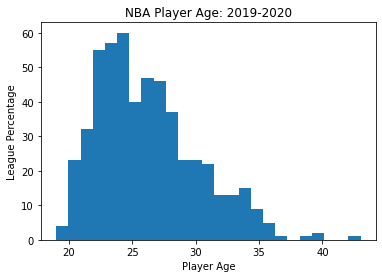

In [29]:
plt.hist(x=nba_df['AGE'], bins=25)
plt.xlabel("Player Age")
plt.ylabel("League Percentage")
plt.title("NBA Player Age: 2019-2020")

In [30]:
# Who played the most?

In [50]:
most_active_gp = nba_df.sort_values(by=['GP'],ascending=False).head(10)
most_active_min = nba_df.sort_values(by=['MIN'],ascending=False).head(10)

In [54]:
most_active_combined = pd.concat([most_active_gp,most_active_min])

In [56]:
most_active_combined[['PLAYER_NAME','TEAM_ABBREVIATION','AGE','GP','MIN']]

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,MIN
363,Maxi Kleber,DAL,28,74,25.5
395,Nikola Jokic,DEN,25,73,32.0
143,Duncan Robinson,MIA,26,73,29.7
371,Mikal Bridges,PHX,23,73,28.0
379,Monte Morris,DEN,25,73,22.4
132,Dillon Brooks,MEM,24,73,28.9
116,Delon Wright,DAL,28,73,21.5
277,Justin Holiday,IND,31,73,25.0
388,Nemanja Bjelica,SAC,32,72,27.9
249,Joe Ingles,UTA,32,72,29.7


In [66]:
young_guns = nba_df[nba_df['AGE'] < 25]

In [69]:
young_guns.sort_values(by=["PTS","FG_PCT"],ascending=False).head(5)

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
488,1629027,Trae Young,1610612737,ATL,21,60,18,42,0.300,35.3,...,9,272,2,4,472,9,17,12,5,16290271610612737
334,1629029,Luka Doncic,1610612742,DAL,21,61,36,25,0.590,33.6,...,21,88,4,6,35,3,10,1,5,16290291610612742
126,1626164,Devin Booker,1610612756,PHX,23,70,34,36,0.486,35.9,...,34,33,8,10,113,25,46,29,5,16261641610612756
288,1626157,Karl-Anthony Towns,1610612750,MIN,24,35,10,25,0.286,33.9,...,26,16,17,11,268,6,21,29,5,16261571610612750
135,1628378,Donovan Mitchell,1610612762,UTA,23,69,43,26,0.623,34.3,...,83,93,43,15,127,41,187,29,5,16283781610612762


In [70]:
# Who is the most well-rounded

In [100]:
tuples = list(zip(nba_df['TEAM_ABBREVIATION'].values, nba_df['PLAYER_ID'].values))

In [101]:
index = pd.MultiIndex.from_tuples(tuples, names=['team', 'id'])

In [103]:
nba_df = nba_df.set_index(keys=index).sort_index(level=0)

In [110]:
age = nba_df.groupby(level=0)['AGE'].agg([np.mean, np.std])

In [111]:
age

,mean,std
team,,
ATL,25.666667,5.562479
BKN,26.909091,4.868843
BOS,25.000000,3.335416
CHA,24.642857,2.648865
CHI,24.764706,3.052241
CLE,24.611111,3.127466
DAL,27.222222,3.734664
DEN,25.470588,3.710082
DET,25.473684,3.517708
